In [2]:
library(naturalsort)
library(fields)
library(rasterImage)
library(pracma) # only needed for moving-average plot
n=256
cols = rainbow(n, s = 1, v = 1, start = 0.7, end = 0, alpha = 1)

Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.2-0 (2018-06-19) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
See www.image.ucar.edu/~nychka/Fields for
 a vignette and other supplements. 
Loading required package: plotrix

Attaching package: ‘plotrix’

The following object is masked from ‘package:fields’:

    color.scale



## Population size time series

In [3]:
flst <- naturalsort(list.files('~/jackgl/test_sim/')) # File names are same for each directory (lung, colon, brain)
res <- array(0,dim=c(5,5))

In [11]:
dataDir <- '~/jackgl/test_sim/'
Ns <- list()
j <- 1
for (i in 6:10) {
    load(paste0(dataDir,flst[i]))
    Ns[[j]] <- N
    j <- j+1
}

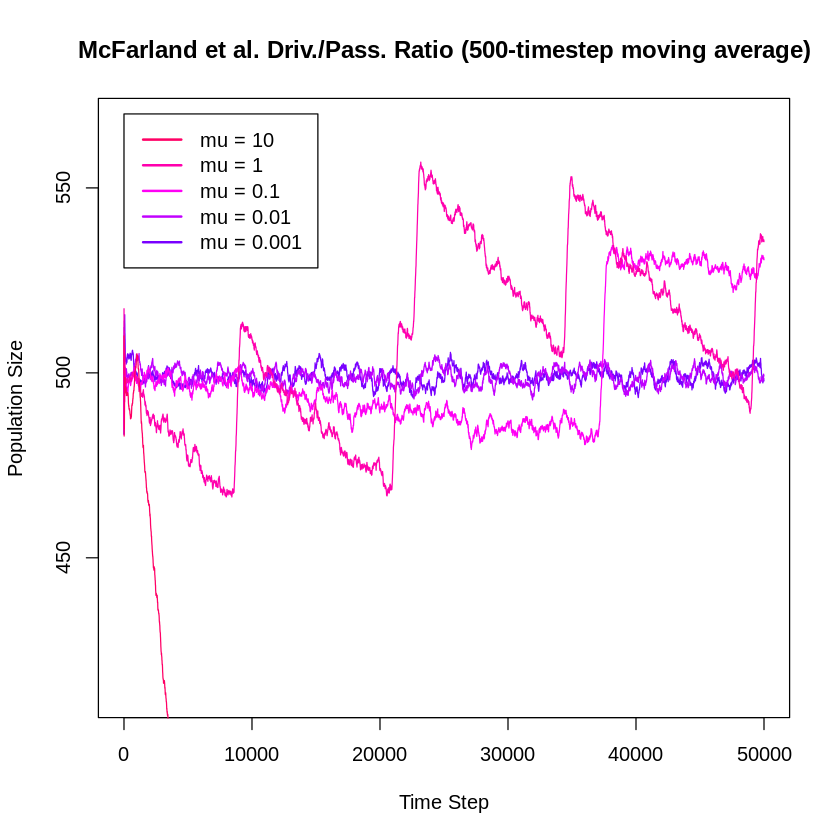

In [14]:
# plot(1:length(Ns[[1]]),Ns[[1]],type='l',xlab='Timestep',ylab='Population Size',ylim=c(0,200),col=cols[1*40])
# for (i in 2:5) {lines(1:length(Ns[[i]]),Ns[[i]],type='l',xlab='Timestep',ylab='Population Size',ylim=c(0,200),col=cols[i*40])}

plot(1:length(Ns[[1]]),movavg(Ns[[1]],500,'s'),type='l',main='McFarland et al. Driv./Pass. Ratio (500-timestep moving average)',xlab='Time Step',ylab='Population Size',ylim=c(min(Ns[[1]]),max(Ns[[5]])),col=cols[1*40])
for (i in 2:5) {lines(1:length(Ns[[i]]),movavg(Ns[[i]],500,'s'),type='l',xlab='Time Step',ylab='Population Size',ylim=c(0,200),col=cols[i*40])}
legend(0,570,legend=c("mu = 10","mu = 1","mu = 0.1","mu = 0.01","mu = 0.001"),lty=1,lwd=2,col = cols[c(200,160,120,80,40)])

mu is the L1 insertion rate per cell cycle (unique to each cell; proportional to birth rate)

In [17]:
dataDir <- '~/jackgl/test_sim/'
Ns <- list()
mui <- 4
j <- 1
for (i in 1:4) {
    load(paste0(dataDir,flst[((i-1)*5)+mui]))
    print(flst[((i-1)*5)+mui])
    N[N==0] <- NA
    Ns[[j]] <- N
    j <- j+1
}

[1] "run_n0100_4.rda"
[1] "run_n0500_9.rda"
[1] "run_n01000_14.rda"
[1] "run_n02000_19.rda"


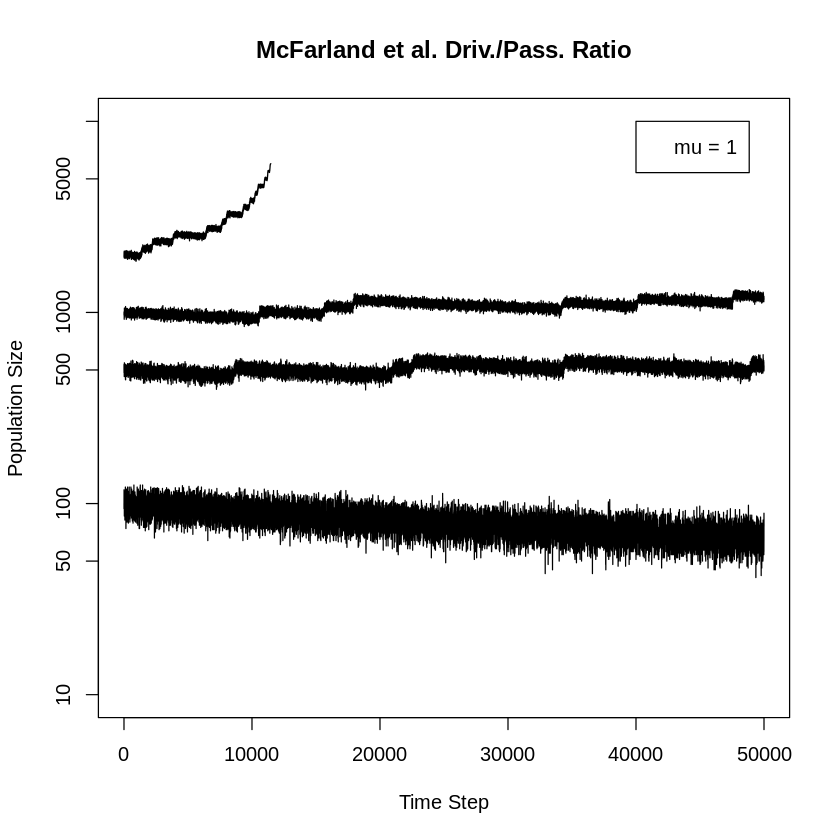

In [18]:
plot(1:length(Ns[[1]]),Ns[[1]],type='l',main='McFarland et al. Driv./Pass. Ratio',xlab='Time Step',ylab='Population Size',ylim=c(10,1e4),log='y')
for (i in 2:4) {lines(1:length(Ns[[i]]),Ns[[i]],type='l',xlab='Time Step',ylab='Population Size')}
legend(40000,10000,legend=c("mu = 1"),lty=0)

## Heat maps

In [19]:
dataDir <- '~/jackgl/test_sim/'
flst <- naturalsort(list.files(dataDir))
res <- matrix(0,nrow=5,ncol=5)
simc <- 1
for (n0 in 1:5) {
    for (mu in 1:5) {
        if (simc==25) {res[n0,mu] <- 0; break}
        load(paste0(dataDir,flst[simc]))
#         N <- movavg(N,500,'s')
        if (max(N)>=3*N[1]) {res[n0,mu] <- max(N)/N[1]}
        else {res[n0,mu] <- tail(N,n=1)/N[1]}
        simc <- simc+1
        
    }
}
res
res[2,5]

1.0600,0.9900,0.8400,0.7800,0.190
0.9800,0.9840,1.0560,1.0520,0.214
0.9730,1.0820,1.0870,1.1880,3.000
0.9970,0.9915,1.3245,3.0000,3.000
0.9732,1.0952,1.4304,3.0002,0.000


[1] 0.214

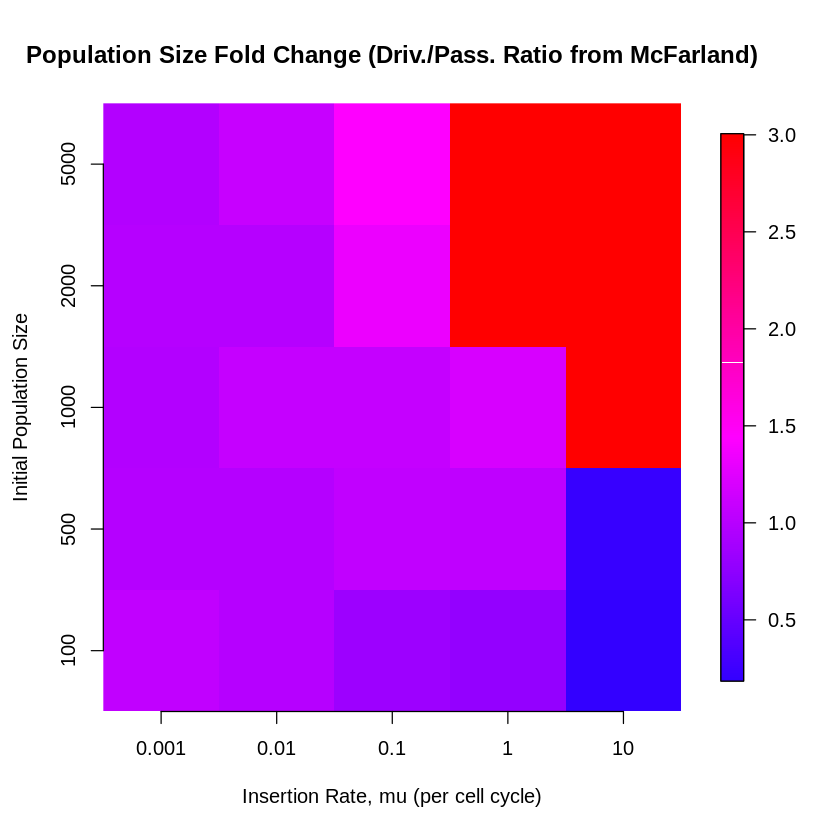

In [21]:
image.plot(t(res),axes=F,col=cols)
title(main="Population Size Fold Change (Driv./Pass. Ratio from McFarland)",xlab='Insertion Rate, mu (per cell cycle)',ylab='Initial Population Size');
axis(1, at=seq(0,1,0.25), labels=c(1e-3,1e-2,1e-1,1e-0,1e1)); 
axis(2, at=seq(0,1,0.25), labels=c(1e2,5e2,1e3,2e3,5e3)); 